In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/drive/MyDrive/multi-class-GAN/data/credit-score.csv')

In [2]:
from sklearn.preprocessing import LabelEncoder
label_e=LabelEncoder()
data['Credit_Score']=label_e.fit_transform(data['Credit_Score'])
data['Credit_Mix']=label_e.fit_transform(data['Credit_Mix'])
data['Payment_Behaviour']=label_e.fit_transform(data['Payment_Behaviour'])
data['Payment_of_Min_Amount']=label_e.fit_transform(data['Payment_of_Min_Amount'])

majority_number=data[data['Credit_Score'] == 2].shape[0] #standard class

poor_n=data[data['Credit_Score'] == 1].shape[0] #poor class
good_n=data[data['Credit_Score'] == 0].shape[0] #good class

data_gen_poor=data[data['Credit_Score']==1]
data_gen_good=data[data['Credit_Score']==0]

samples_to_generate_poor=majority_number-poor_n
samples_to_generate_good=majority_number-good_n

In [ ]:
!pip install sdv

In [ ]:
data_gen_poor

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
56,30.0,11.0,5.0,24.448063,176.0,0,162.441009,298.192158,1,2,...,30.0,34081.38,8.0,7.0,15.0,3.0,2611.115000,17.13,1704.18,70.478333
57,30.0,14.0,5.0,35.171160,176.0,2,38.436983,392.196185,1,2,...,30.0,34081.38,8.0,7.0,15.0,3.0,2611.115000,17.13,1704.18,70.478333
58,31.0,14.0,5.0,35.111552,177.0,2,199.720765,260.912402,1,2,...,30.0,34081.38,8.0,7.0,15.0,3.0,2611.115000,17.13,1704.18,70.478333
59,34.0,14.0,5.0,29.762159,178.0,2,220.552192,260.080975,1,2,...,30.0,34081.38,8.0,7.0,15.0,3.0,2611.115000,17.13,1704.18,70.478333
63,30.0,14.0,9.0,33.823488,182.0,2,29.326364,411.306804,1,2,...,30.0,34081.38,8.0,7.0,15.0,3.0,2611.115000,17.13,1704.18,70.478333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99954,20.0,6.0,3.0,39.323569,377.0,1,140.581403,410.256158,1,1,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
99955,23.0,7.0,3.0,34.663572,378.0,1,60.971333,479.866228,1,1,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
99956,18.0,7.0,3.0,40.565631,379.0,1,54.185950,496.651610,1,1,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
99957,27.0,6.0,3.0,41.255522,380.0,1,24.028477,516.809083,1,1,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023


In [ ]:
from sdv.single_table import CopulaGANSynthesizer
from sdv.metadata import Metadata
metadata = Metadata.detect_from_dataframe(data=data_gen_poor)
synthesizer = CopulaGANSynthesizer(metadata,epochs=100,verbose=True)
synthesizer.fit(data_gen_poor)
synthetic_data = synthesizer.sample(num_rows=samples_to_generate_poor)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.69) | Discrim. (0.06): 100%|██████████| 100/100 [15:04<00:00,  9.05s/it]


In [ ]:
metadata1 = Metadata.detect_from_dataframe(data=data_gen_good)
synthesizer = CopulaGANSynthesizer(metadata1,epochs=100,verbose=True)
synthesizer.fit(data_gen_good)
synthetic_data_good = synthesizer.sample(num_rows=samples_to_generate_good)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Gen. (-0.57) | Discrim. (0.00): 100%|██████████| 100/100 [08:37<00:00,  5.18s/it]


In [ ]:
syn_data_concat=pd.concat([synthetic_data,synthetic_data_good])
syn_data_concat.to_csv('syn_data_concat_copulaGAN.csv')

In [ ]:
data_concat=pd.concat([data,synthetic_data,synthetic_data_good])
data_concat.to_csv('credit-score-1-copulaGAN.csv',index=False)

In [3]:
data_concat=pd.read_csv('/content/drive/MyDrive/multi-class-GAN/data/credit-score-1-copulaGAN.csv')

In [4]:
from scipy.stats import wasserstein_distance
distance = []

for col in data.columns:
    distance = wasserstein_distance(data[col], data_concat[col])
    print(f"Feature: {col} | Wasserstein Distance: {distance:.3f}")

average_wasserstein_distance = np.mean(distance)
print(f"\nAverage Wasserstein Distance: {average_wasserstein_distance:.3f}")

Feature: Delay_from_due_date | Wasserstein Distance: 0.567
Feature: Num_of_Delayed_Payment | Wasserstein Distance: 0.572
Feature: Num_Credit_Inquiries | Wasserstein Distance: 0.147
Feature: Credit_Utilization_Ratio | Wasserstein Distance: 0.131
Feature: Credit_History_Age | Wasserstein Distance: 3.812
Feature: Payment_of_Min_Amount | Wasserstein Distance: 0.050
Feature: Amount_invested_monthly | Wasserstein Distance: 6.921
Feature: Monthly_Balance | Wasserstein Distance: 14.808
Feature: Credit_Score | Wasserstein Distance: 0.353
Feature: Credit_Mix | Wasserstein Distance: 0.066
Feature: Payment_Behaviour | Wasserstein Distance: 0.079
Feature: Age | Wasserstein Distance: 0.725
Feature: Annual_Income | Wasserstein Distance: 1509.594
Feature: Num_Bank_Accounts | Wasserstein Distance: 0.173
Feature: Num_Credit_Card | Wasserstein Distance: 0.062
Feature: Interest_Rate | Wasserstein Distance: 0.661
Feature: Num_of_Loan | Wasserstein Distance: 0.034
Feature: Monthly_Inhand_Salary | Wasserstei

In [5]:
from scipy.stats import ks_2samp

stat=[]
for col in data.columns:
    stat, p_value = ks_2samp(data[col], data_concat[col])
    print(f"Feature: {col} | KS Statistic: {stat:.3f} | p-value: {p_value}")

avg_stat = np.mean(stat)
print(f"\nAverage KS Statistic: {avg_stat:.8f}")

Feature: Delay_from_due_date | KS Statistic: 0.023 | p-value: 5.634733062441056e-29
Feature: Num_of_Delayed_Payment | KS Statistic: 0.041 | p-value: 7.85952639494546e-92
Feature: Num_Credit_Inquiries | KS Statistic: 0.024 | p-value: 4.939554206711208e-31
Feature: Credit_Utilization_Ratio | KS Statistic: 0.017 | p-value: 9.266822269819224e-17
Feature: Credit_History_Age | KS Statistic: 0.035 | p-value: 3.954376191671236e-67
Feature: Payment_of_Min_Amount | KS Statistic: 0.043 | p-value: 2.543278525121416e-100
Feature: Amount_invested_monthly | KS Statistic: 0.025 | p-value: 6.944706597240572e-34
Feature: Monthly_Balance | KS Statistic: 0.027 | p-value: 5.20695869790466e-39
Feature: Credit_Score | KS Statistic: 0.198 | p-value: 0.0
Feature: Credit_Mix | KS Statistic: 0.064 | p-value: 3.8331563154254434e-221
Feature: Payment_Behaviour | KS Statistic: 0.025 | p-value: 5.004945438567185e-35
Feature: Age | KS Statistic: 0.034 | p-value: 2.2331978194926508e-63
Feature: Annual_Income | KS Stat

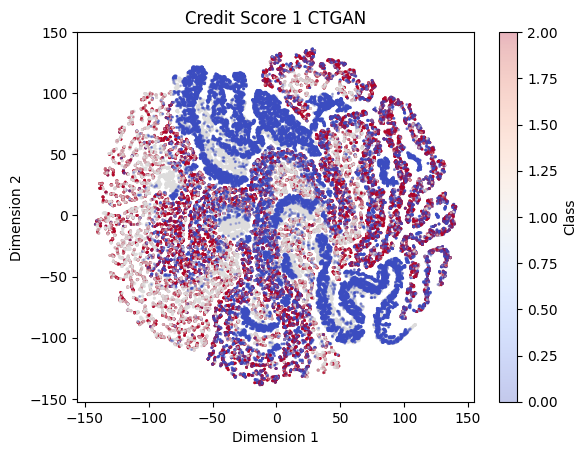

In [ ]:
features = data_concat.drop(['Credit_Score'], axis=1)
labels = data_concat['Credit_Score']

 #Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Credit Score 1 CTGAN')
plt.colorbar(label='Class')
plt.show()

In [ ]:
X=data_concat.drop(['Credit_Score'],axis=1)
y=data_concat['Credit_Score']

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have X, y data
# Binarize the output labels for AUC calculation (One-vs-Rest)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = xgb_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = xgb_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), digits=3))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:35:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 80.38%

Classification Report:
              precision    recall  f1-score   support

           0      0.747     0.928     0.828     15968
           1      0.848     0.794     0.820     15964
           2      0.839     0.689     0.757     15903

    accuracy                          0.804     47835
   macro avg      0.811     0.804     0.802     47835
weighted avg      0.811     0.804     0.802     47835



In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Assuming you have X, y data
# Binarize the output labels for AUC calculation (One-vs-Rest)
y_bin = label_binarize(y, classes=np.unique(y))
n_classes = y_bin.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = rf_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = rf_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), digits=3))

Accuracy: 82.93%

Classification Report:
              precision    recall  f1-score   support

           0      0.783     0.928     0.849     15968
           1      0.866     0.813     0.839     15964
           2      0.853     0.747     0.797     15903

    accuracy                          0.829     47835
   macro avg      0.834     0.829     0.828     47835
weighted avg      0.834     0.829     0.828     47835



In [ ]:
# Import necessary libraries
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LightGBM classifier
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=6, objective='multiclass')

# Train the model
lgbm_model.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_score = lgbm_model.predict_proba(X_test)

# Predict the labels for G-Mean calculation
y_pred = lgbm_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2527
[LightGBM] [Info] Number of data points in the train set: 111612, number of used features: 20
[LightGBM] [Info] Start training from score -1.099231
[LightGBM] [Info] Start training from score -1.099123
[LightGBM] [Info] Start training from score -1.097484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred,digits=3))

Accuracy: 74.87%

Classification Report:
              precision    recall  f1-score   support

           0      0.796     0.774     0.785     15968
           1      0.764     0.744     0.754     15964
           2      0.691     0.728     0.709     15903

    accuracy                          0.749     47835
   macro avg      0.750     0.749     0.749     47835
weighted avg      0.750     0.749     0.749     47835



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (k) as needed

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report with 3 decimal precision
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 74.58%

Classification Report:
              precision    recall  f1-score   support

           0      0.764     0.757     0.760     15968
           1      0.759     0.737     0.748     15964
           2      0.716     0.743     0.729     15903

    accuracy                          0.746     47835
   macro avg      0.746     0.746     0.746     47835
weighted avg      0.746     0.746     0.746     47835



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Train the Logistic Regression model
logreg_model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report with 3 decimal precision
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

Accuracy: 59.97%

Classification Report:
              precision    recall  f1-score   support

           0      0.576     0.663     0.617     15968
           1      0.673     0.670     0.671     15964
           2      0.546     0.466     0.503     15903

    accuracy                          0.600     47835
   macro avg      0.598     0.600     0.597     47835
weighted avg      0.598     0.600     0.597     47835



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
